# Brownian Motion (Winener Process)

we can combine them and rescale them to build more complex processes that successfully approximate the data.
Brownian motion is a continuous process such that its increments for any time scale are drawn from a normal distribution.

### Definition

A process $W$, a continuos function of $t$, i.e. $W = W(t)$ is a Brownian motion (Wiener process) if $W(0) = 0$ and if for all $0 = t_0 < t_1 < … < t_m$ the increments

$W(t_1) — W(t_0), W(t_2) — W(t_1), …, W(t_m) — W(t_[m-1])$

are indepenent and normally distributed. The mean of the distribution (normal) is zero and its variance is the time difference $t_{i+1}—t_i$.

In [1]:
from typing import Optional
import numpy as np

def get_dW(T: int, random_state: Optional[int] = None) -> np.ndarray:
    """
    Sample T times from a normal distribution,
    to simulate discrete increments (dW) of a Brownian Motion.
    Optional random_state to reproduce results.
    """
    np.random.seed(random_state)
    return np.random.normal(0.0, 1.0, T)


def get_W(T: int, random_state: Optional[int] = None) -> np.ndarray:
    """
    Simulate a Brownian motion discretely samplet at unit time increments.
    Returns the cumulative sum
    """
    dW = get_dW(T, random_state)
    # cumulative sum and then make the first index 0.
    dW_cs = dW.cumsum()
    return np.insert(dW_cs, 0, 0)[:-1]

(array([-20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

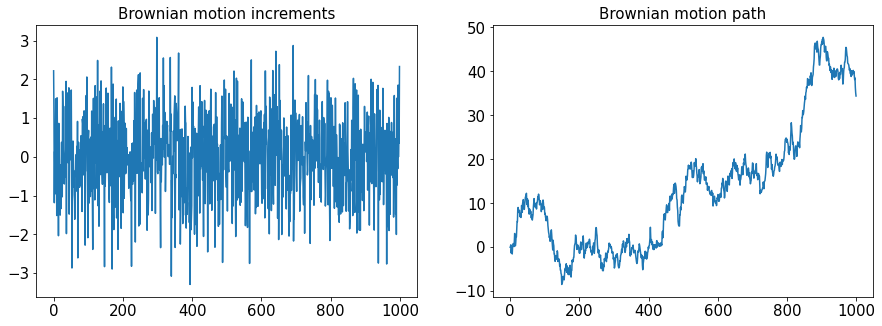

In [2]:
dW = get_dW(T=1_000)
W = get_W(T=1_000)

#----------------------------------------------------------------
# plot

import matplotlib.pyplot as plt 
import seaborn as sns

fig = plt.figure(figsize=(15, 5))

title = "Brownian motion increments"
plt.subplot(1, 2, 1)
plt.plot(dW)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

title = "Brownian motion path"
plt.subplot(1, 2, 2)
plt.plot(W)
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

## Correlated processes

In [3]:
def _get_correlated_dW(
    dW: np.ndarray, rho: float, random_state: Optional[int] = None
) -> np.ndarray:
    """
    Sample correlated discrete Brownian increments to given increments dW.
    """
    dW2 = get_dW(
        len(dW), random_state=random_state
    )  # generate Brownian icrements.
    if np.array_equal(dW2, dW):
        # dW cannot be equal to dW2.
        raise ValueError(
            "Brownian Increment error, try choosing different random state."
        )
    return rho * dW + np.sqrt(1 - rho ** 2) * dW2

In [4]:
from typing import Optional

import numpy as np

def get_corr_dW_matrix(
    T: int,
    n_procs: int,
    rho: Optional[float] = None,
    random_state: Optional[int] = None,
) -> np.ndarray:
    """
    2D array of n_procs discrete Brownian Motion increments dW.
    Each column of the array is one process.
    So that the resulting shape of the array is (T, n_procs).
        - T is the number of samples of each process.
        - The correlation constant rho is used to generate a new process,
            which has rho correlation to a random process already generated,
            hence rho is only an approximation to the pairwise correlation.
        - Optional random_state to reproduce results.
    """
    rng = np.random.default_rng(random_state)
    dWs: list[np.ndarray] = []
    for i in range(n_procs):
        random_state_i = _get_random_state_i(random_state, i)
        if i == 0 or rho is None:
            dW_i = get_dW(T, random_state=random_state_i)
        else:
            dW_corr_ref = _get_corr_ref_dW(dWs, i, rng)
            dW_i = _get_correlated_dW(dW_corr_ref, rho, random_state_i)
        dWs.append(dW_i)
    return np.asarray(dWs).T
    

def _get_random_state_i(random_state: Optional[int], i: int) -> Optional[int]:
    """Add i to random_state is is int, else return None."""
    return random_state if random_state is None else random_state + i


def _get_corr_ref_dW(
    dWs: list[np.ndarray], i: int, rng: np.random.Generator
) -> np.ndarray:
    """
    Choose randomly a process (dW) the from the
    already generated processes (dWs).
    """
    random_proc_idx = rng.choice(i)
    return dWs[random_proc_idx]

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5]),
 [Text(0, 0.5, '0'),
  Text(0, 2.5, '2'),
  Text(0, 4.5, '4'),
  Text(0, 6.5, '6'),
  Text(0, 8.5, '8'),
  Text(0, 10.5, '10'),
  Text(0, 12.5, '12'),
  Text(0, 14.5, '14'),
  Text(0, 16.5, '16'),
  Text(0, 18.5, '18'),
  Text(0, 20.5, '20'),
  Text(0, 22.5, '22'),
  Text(0, 24.5, '24'),
  Text(0, 26.5, '26'),
  Text(0, 28.5, '28'),
  Text(0, 30.5, '30'),
  Text(0, 32.5, '32'),
  Text(0, 34.5, '34'),
  Text(0, 36.5, '36'),
  Text(0, 38.5, '38'),
  Text(0, 40.5, '40'),
  Text(0, 42.5, '42'),
  Text(0, 44.5, '44'),
  Text(0, 46.5, '46'),
  Text(0, 48.5, '48'),
  Text(0, 50.5, '50'),
  Text(0, 52.5, '52')])

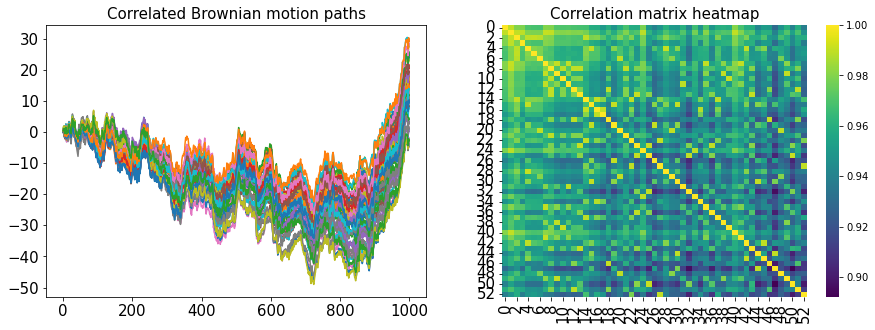

In [5]:

T = 1_000
n_procs = 53
rho = 0.99

corr_dWs = get_corr_dW_matrix(T, n_procs, rho)

#----------------------------------------------------------------
# plot

import matplotlib.pyplot as plt 
import seaborn as sns

fig = plt.figure(figsize=(15, 5))

# paths
title = "Correlated Brownian motion paths"
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(corr_dWs, axis=0))
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# correlation
title = "Correlation matrix heatmap"
plt.subplot(1, 2, 2)
sns.heatmap(np.corrcoef(corr_dWs, rowvar=False), cmap="viridis")
plt.gca().set_title(title, fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)